# Importing the Required Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Supress warnings

In [ ]:
file_path = r'D:\Projects\Mini_Projects\Clickstream_customer_conversion\Research_Data\train_data.csv' # Path to the CSV file

In [4]:
df = pd.read_csv(file_path) # Read the data

In [5]:
df.shape # Check the shape of the data

(132379, 14)

In [6]:
df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


# Exploratory Data Analysis

In [14]:
df.describe()  # Check the data types of the columns

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [15]:
num = df.select_dtypes(exclude = 'object')  # Select only numeric columns

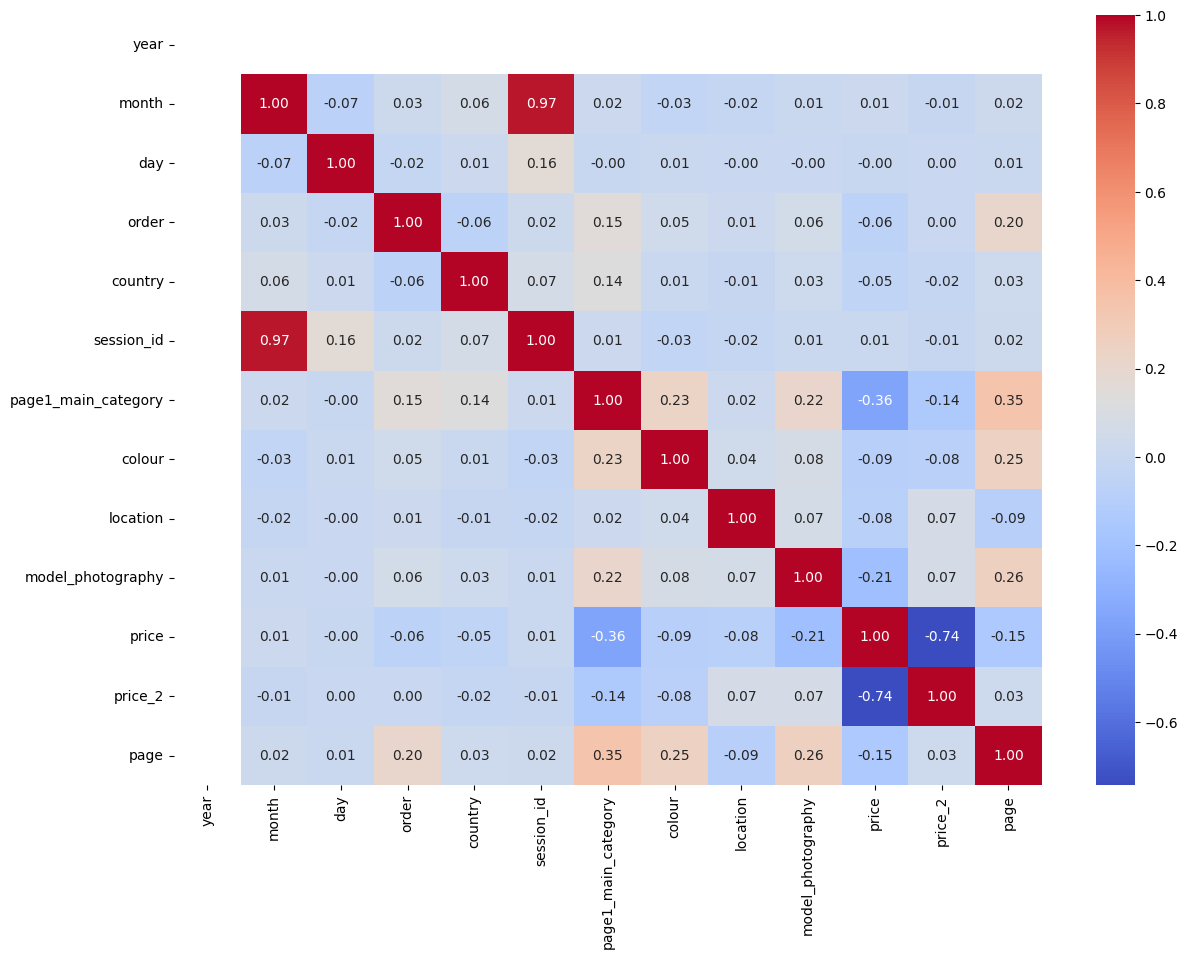

In [16]:
# plot the distribution of numeric columns

plt.figure(figsize = (14,10))
corr = num.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

# Price Distribution

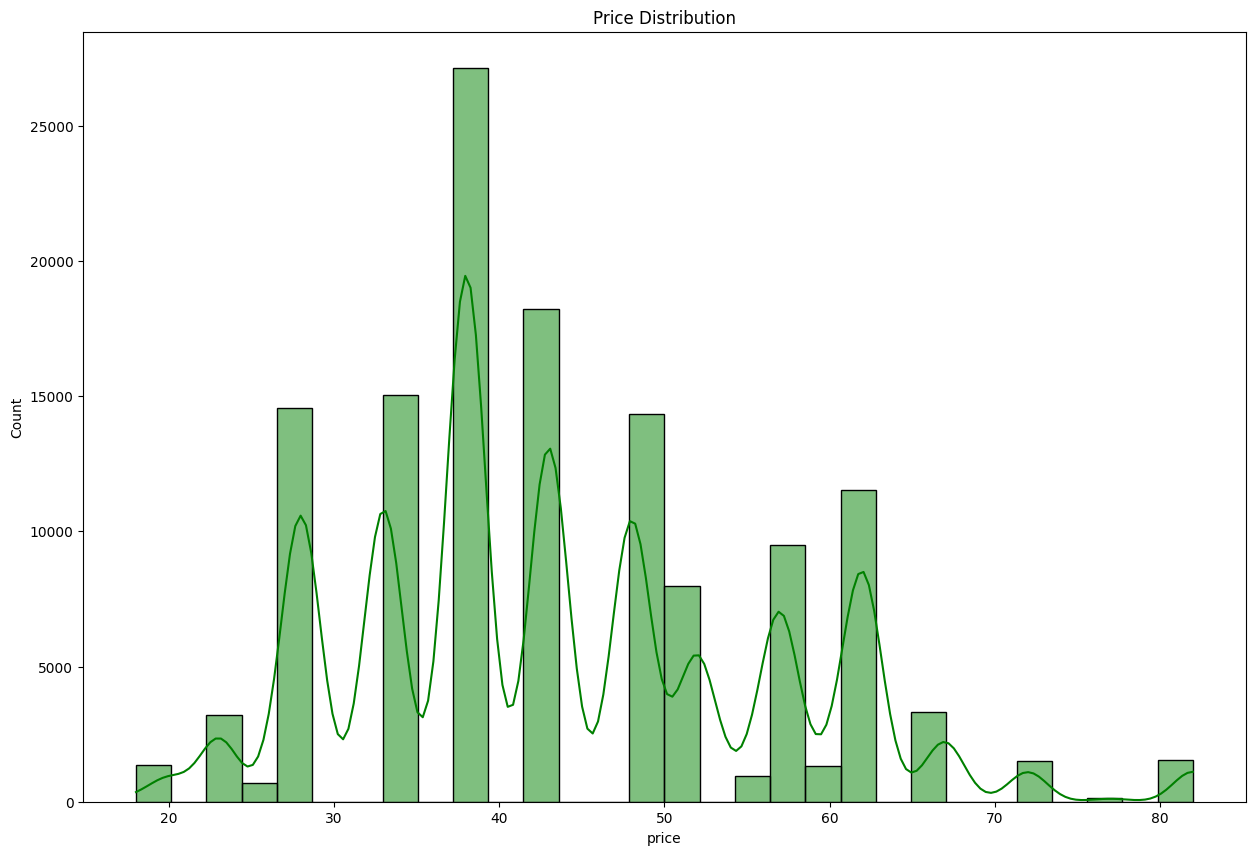

In [17]:
# Histogram of Price Distribution

plt.figure(figsize=(15, 10))
sns.histplot(df['price'], bins = 30, kde = True, color = 'Green')
plt.title("Price Distribution")
plt.show()

# Top 10 Countries by Clickstream Activity

In [20]:
# Histogram of Price Distribution by Country

top_countries = df['country'].value_counts().head(10)

country_mappings = {'1': 'Australia','2': 'Austria','3': 'Belgium','4': 'British Virgin Islands','5': 'Cayman Islands','6': 'Christmas Island','7': 'Croatia','8': 'Cyprus',
            '9': 'Czech Republic','10': 'Denmark','11': 'Estonia','12': 'unidentified','13': 'Faroe Islands','14': 'Finland','15': 'France','16': 'Germany','17': 'Greece',
            '18': 'Hungary','19': 'Iceland','20': 'India','21': 'Ireland','22': 'Italy','23': 'Latvia','24': 'Lithuania','25': 'Luxembourg','26': 'Mexico','27': 'Netherlands',
            '28': 'Norway','29': 'Poland','30': 'Portugal','31': 'Romania','32': 'Russia','33': 'San Marino','34': 'Slovakia','35': 'Slovenia','36': 'Spain',
            '37': 'Sweden','38': 'Switzerland','39': 'Ukraine','40': 'United Arab Emirates','41': 'United Kingdom','42': 'USA','43': 'biz (.biz)','44': 'com (.com)',
            '45': 'int (.int)','46': 'net (.net)','47': 'org (*.org)'}

top_countries.index = top_countries.index.astype(str).map(country_mappings)

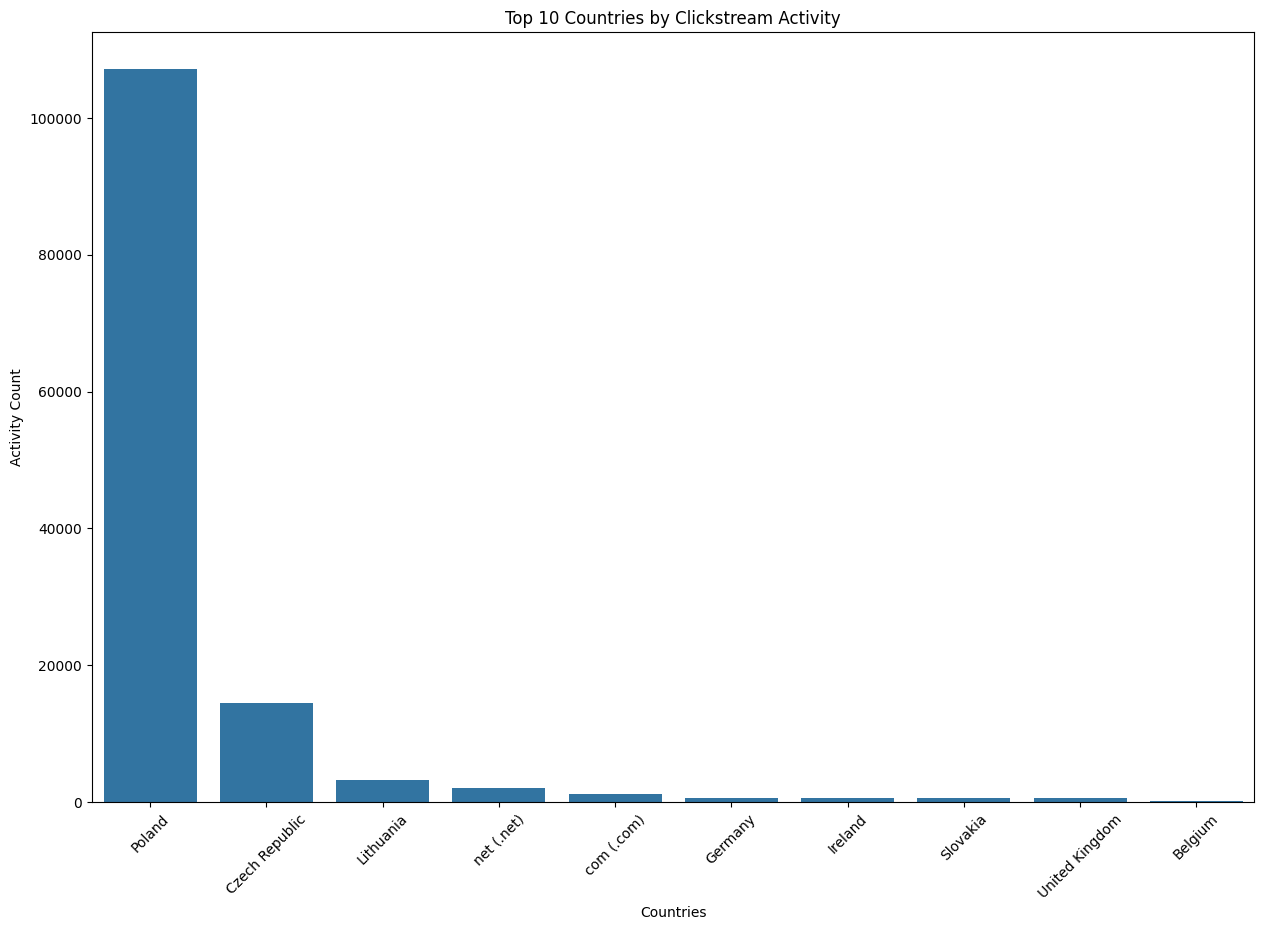

In [21]:
# Seaborn barplot of top 10 countries

plt.figure(figsize=(15, 10))
sns.barplot(x = top_countries.index, y = top_countries.values)
plt.title('Top 10 Countries by Clickstream Activity')
plt.xlabel('Countries')
plt.ylabel('Activity Count')
plt.xticks(rotation = 45)
plt.show()

# Distribution of Main Product Categories

In [22]:
# mapping page1_main_category to a more readable format

page_mappings = {
    1:'trousers', 2:'skirts', 3:'blouses', 4:'sale'
}

category_maps = df['page1_main_category'].map(page_mappings)

In [23]:
category_maps

0          blouses
1           skirts
2          blouses
3           skirts
4           skirts
            ...   
132374        sale
132375     blouses
132376    trousers
132377     blouses
132378      skirts
Name: page1_main_category, Length: 132379, dtype: object

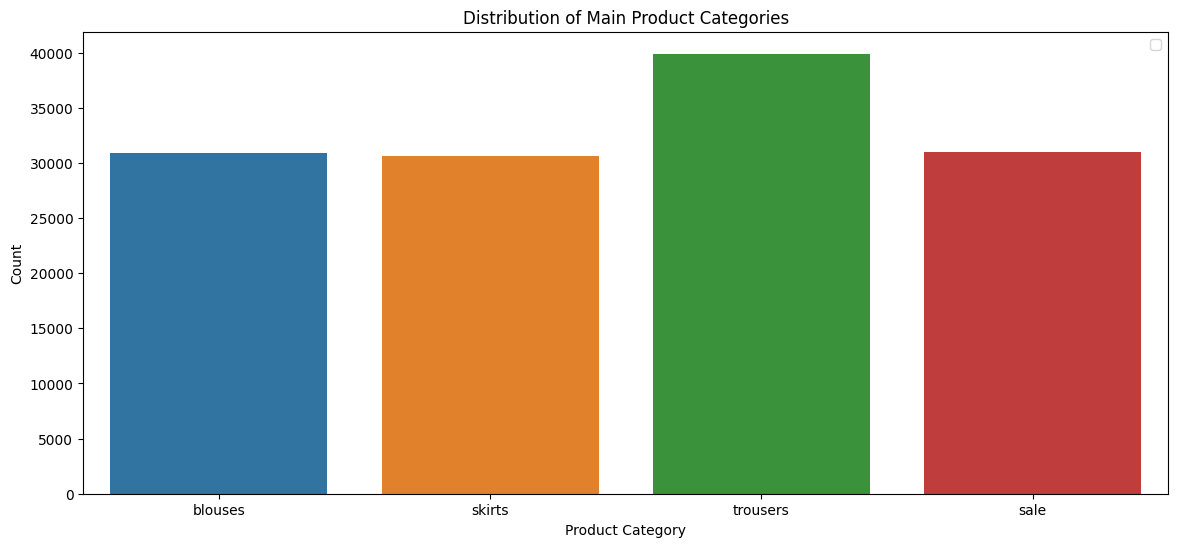

In [25]:
# Seaborn countplot of main product categories

plt.figure(figsize=(14, 6))
sns.countplot(data = df, x = category_maps, hue = category_maps)
plt.title('Distribution of Main Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend()
plt.show()

# Colour Preference of Customers

In [28]:
# mappings for the colour column

color_mappings = {
    1: 'beige',2: 'black',3: 'blue',4: 'brown',5: 'burgundy',6: 'gray',7: 'green',8: 'navy blue',9: 'many colors',
    10: 'olive',11: 'pink',12: 'red',13: 'violet',14: 'white'
}

colour_maps = df['colour'].astype(str).map(color_mappings)

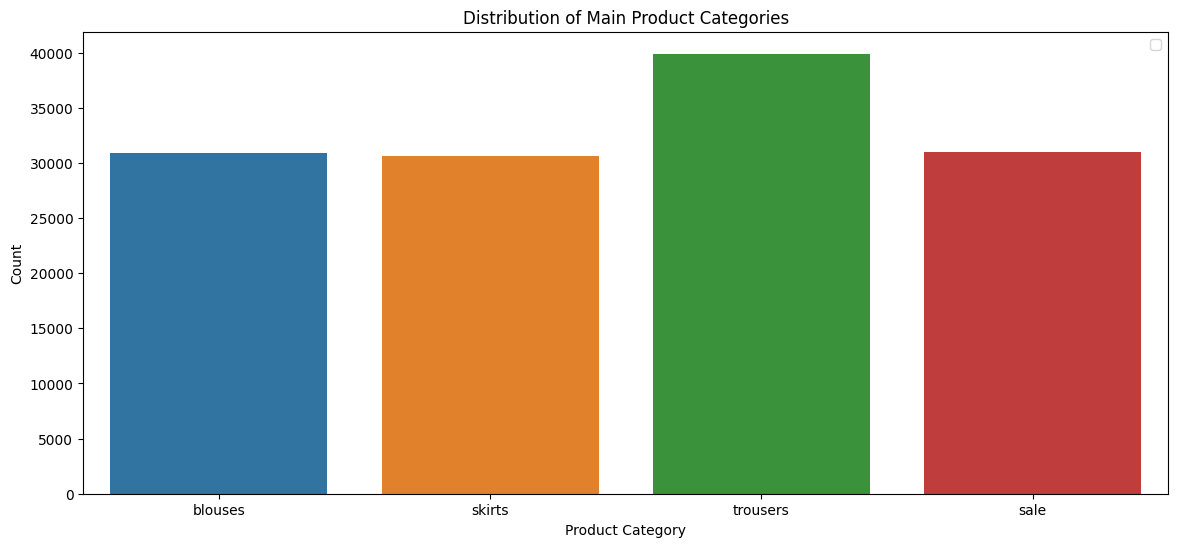

In [26]:
# Seaborn countplot of main product categories

plt.figure(figsize=(14, 6))
sns.countplot(data = df, x = category_maps, hue = category_maps)
plt.title('Distribution of Main Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend()
plt.show()


# Session Activity Over the Months

In [29]:
month_count = df.groupby("month").count().reset_index()

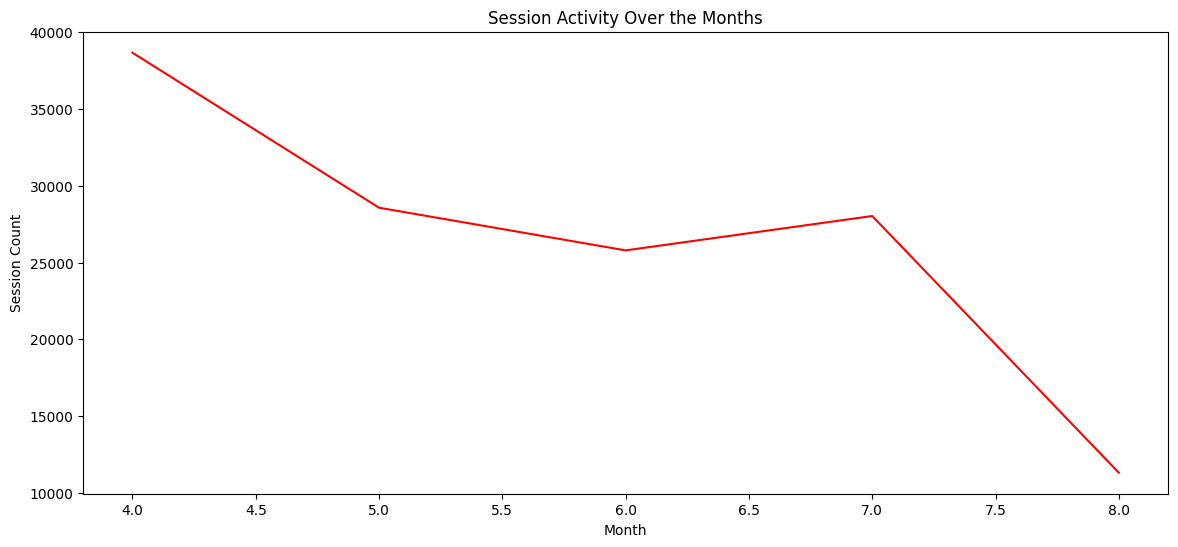

In [33]:
# Seaborn lineplot of session activity over the months

plt.figure(figsize=(14, 6))
sns.lineplot(data = month_count, x = "month", y = "session_id", markers = 'o', color = 'r')
plt.title("Session Activity Over the Months")
plt.xlabel("Month")
plt.ylabel("Session Count")
plt.show()

# Daily Session Trends Over Time

In [34]:
# Date conversion for daily session count

date = pd.to_datetime(df[["year", "month", "day"]])

daily_sessions = df.groupby(date)["session_id"].count()

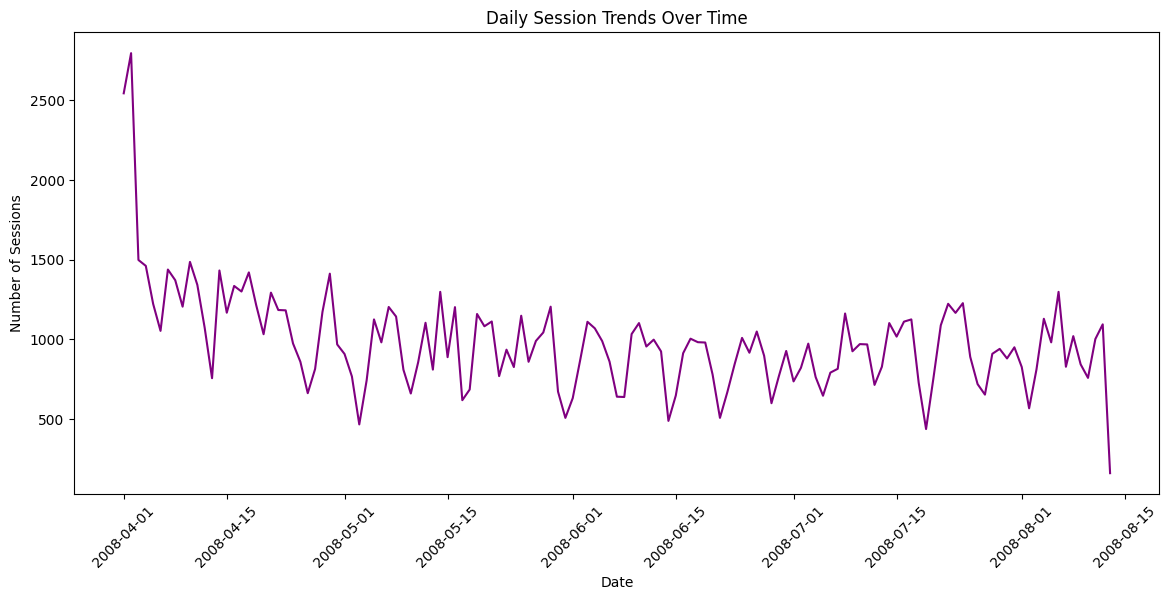

In [37]:
# Seaborn lineplot of Daily Session Trends over Time

plt.figure(figsize=(14, 6))

sns.lineplot(x = daily_sessions.index, y = daily_sessions.values, color = "purple")
plt.title("Daily Session Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.show()

# Top 10 Most Common Clickstream Paths

In [39]:
# Clickstream Path Analysis

clickstream_paths = df.groupby("session_id")["page1_main_category"].apply(lambda x: " -> ".join(map(str, x)))

top_paths = clickstream_paths.value_counts().head(10)

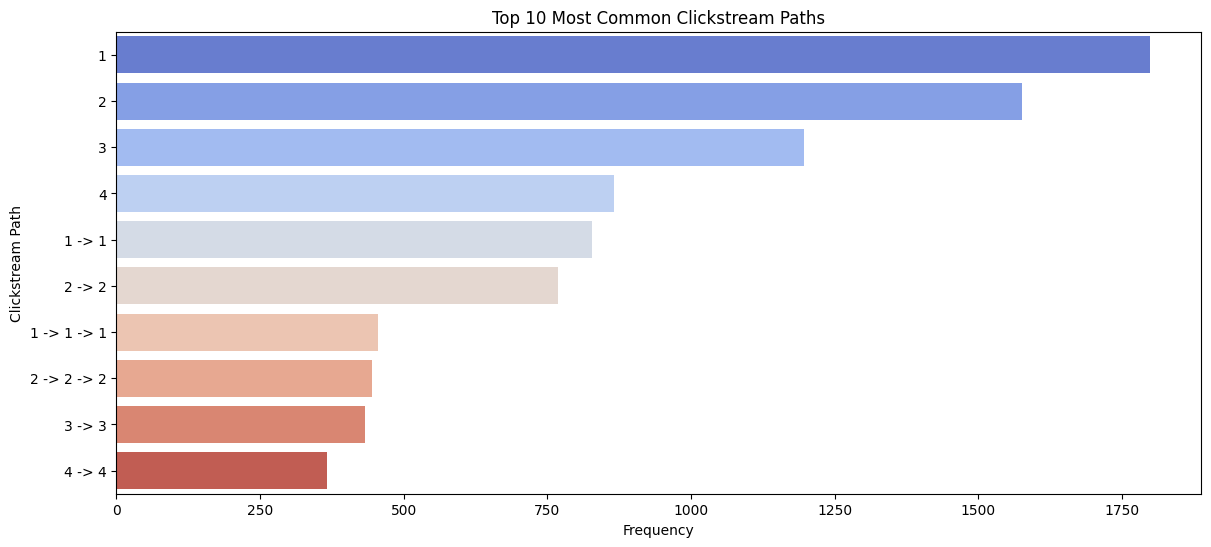

In [41]:
# Seaborn barplot of top 10 most common clickstream paths

plt.figure(figsize=(14, 6))
sns.barplot(y = top_paths.index, x = top_paths.values, palette = "coolwarm")
plt.title("Top 10 Most Common Clickstream Paths")
plt.xlabel("Frequency")
plt.ylabel("Clickstream Path")
plt.show()

# Total Clicks Per Session

In [ ]:
# Session Analysis

session_analysis = df.groupby('session_id').agg(
    total_clicks = ("order","count"),
    avg_price = ("price","mean"),
    unique_products = ("page2_clothing_model","nunique"),
    browsing_depth = ("page","max")
).reset_index()

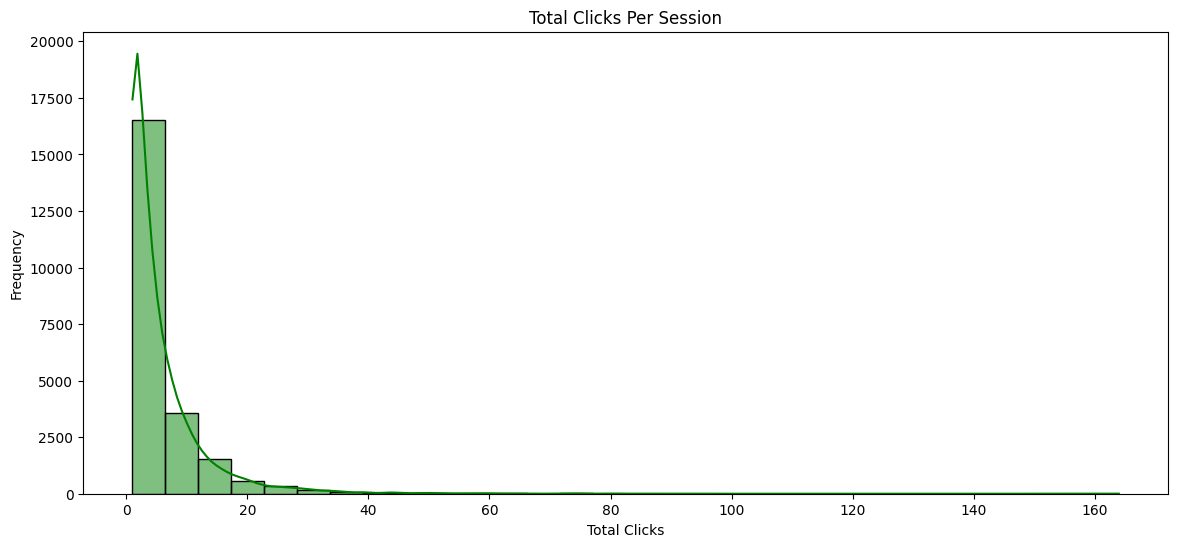

In [12]:
# Histogram of Total Clicks Per Session 

plt.figure(figsize=(14, 6))


sns.histplot(session_analysis['total_clicks'], bins = 30, kde = True, color = 'green')
plt.title('Total Clicks Per Session')
plt.xlabel('Total Clicks')
plt.ylabel('Frequency')
plt.show()

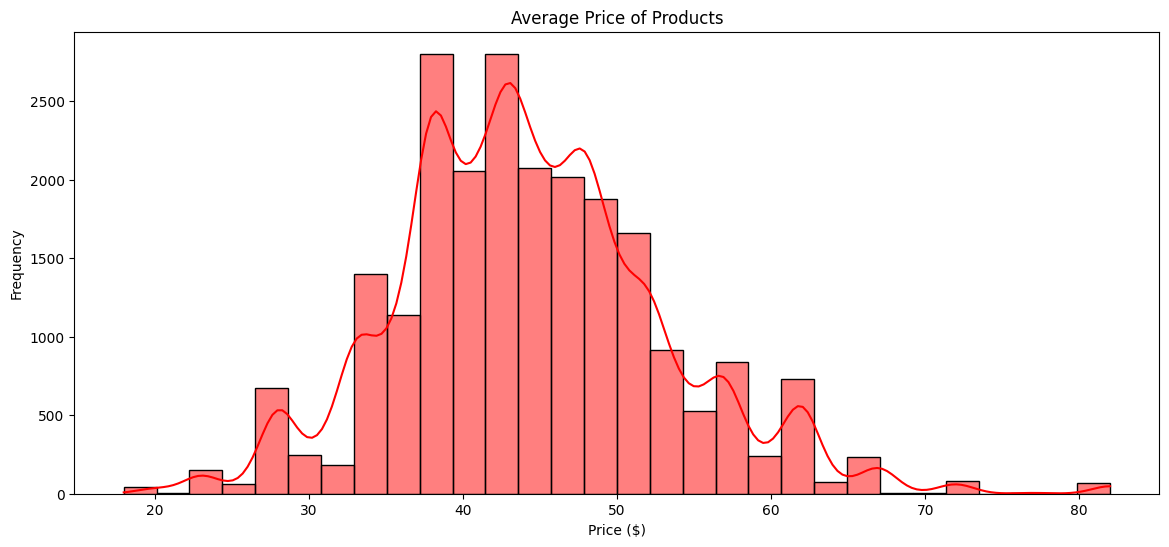

In [ ]:
# Histogram of average price

plt.figure(figsize=(14, 6))

sns.histplot(session_analysis['avg_price'], bins = 30, kde = True, color = 'red')
plt.title('Average Price of Products')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [26]:
df_features = df.copy()

df_features = df_features.merge(session_analysis, on = 'session_id', how = 'left')

In [27]:
# Convert year, month, day to a datetime format

df_features['weekday'] = pd.to_datetime(df_features[['year', 'month', 'day']]).dt.dayofweek

# Use vectorized operation for weekend classification

df_features['weekend'] = (df_features['weekday'] >= 5).astype(int)

# Compute median once and use a vectorized condition

median_price = df_features['price'].median()
df_features['high_price_preference'] = (df_features['price'] > median_price).astype(int)

In [ ]:
df_features.head() # Check the first five rows of the modified DataFrame

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,price,price_2,page,total_clicks,avg_price,unique_products,browsing_depth,weekday,weekend,high_price_preference
0,2008,6,22,21,29,15648,3,C20,13,1,...,48,1,2,84,46.928571,55,4,6,1,1
1,2008,5,19,6,29,10018,2,B26,13,3,...,57,1,2,9,57.666667,4,2,0,0,1
2,2008,7,15,2,29,19388,3,C13,9,5,...,48,1,1,10,38.900000,9,3,1,0,1
3,2008,5,2,2,29,7181,2,B11,2,4,...,43,2,1,6,51.666667,5,2,4,0,0
4,2008,6,9,16,29,13493,2,B31,9,5,...,57,1,2,15,52.333333,12,2,0,0,1


In [ ]:
## Create the New Directory

# import os
# os.makedirs('Preprocessed_data', exist_ok = True)

In [ ]:
# Convert the DataFrame to CSV

df_features.to_csv('D:\\Projects\\Mini_Projects\\Clickstream_customer_conversion\\Research_Data\\cleaned_data.csv', index = False)